# Vecteurs de mot
# 03/12/2021
# @author : jeremylhour

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import fasttext.util
from nlp_utils import reduce_to_k_dim, plot_embeddings, plot_on_axes

In [2]:
print("="*80)
print("CHARGEMENT DU MODELE")
print("="*80)

ft = fasttext.load_model('fastText/cc.fr.300.bin')

CHARGEMENT DU MODELE


EXEMPLE 1 : PAYS ET CAPITALES
Running Truncated SVD over 16 words...
Done.


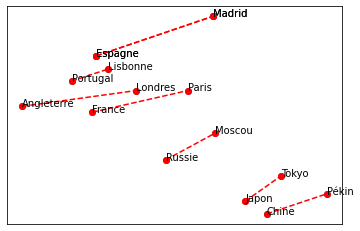

In [6]:
print("="*80)
print("EXEMPLE 1 : PAYS ET CAPITALES")
print("="*80)

liste_capitales = [
    'France', 'Paris',
    'Espagne', 'Madrid',
    'Angleterre', 'Londres',
    'Espagne', 'Madrid',
    'Portugal', 'Lisbonne',
    'Japon', 'Tokyo',
    'Chine', 'Pékin',
    'Russie', 'Moscou',
                ]
word2ind = dict(zip(liste_capitales, [i for i in range(len(liste_capitales))]))

M = np.array([ft.get_word_vector(mot) for mot in liste_capitales])
M_reduced = reduce_to_k_dim(M, k=2)

plot_embeddings(M_reduced, word2ind, liste_capitales, 'imgs/capitals.png')

EXEMPLE 2 : MASCULIN ET FEMININ
Running Truncated SVD over 18 words...
Done.


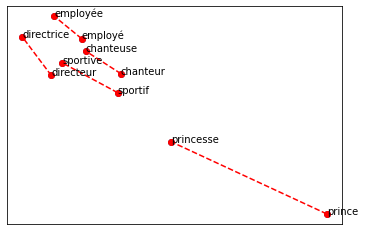

In [7]:
print("="*80)
print("EXEMPLE 2 : MASCULIN ET FEMININ")
print("="*80)

liste_de_mots = [
    'chanteur', 'chanteuse',
    'prince', 'princesse',
    'directeur', 'directrice',
    'sportif', 'sportive',
    'employé', 'employée',
    'musicien', 'musicienne',
    'lui', 'elle',
    'heureux', 'heureuse',
    'roi', 'reine',
                ]
word2ind = dict(zip(liste_de_mots, [i for i in range(len(liste_de_mots))]))

M = np.array([ft.get_word_vector(mot) for mot in liste_de_mots])
M_reduced = reduce_to_k_dim(M, k=2)

plot_embeddings(M_reduced, word2ind, liste_de_mots[:10], 'imgs/feminin_masculin.png')

EXEMPLE 3 : REPRESENTATION SELON AXES DE GENRE ET DE CLASSE
Construction de l'axe de genre...
Construction de l'axe de classe sociale...
Représentation sur ces deux axes...


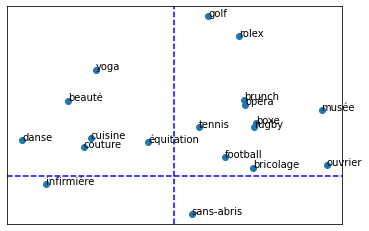

In [10]:
print("="*80)
print("EXEMPLE 3 : REPRESENTATION SELON AXES DE GENRE ET DE CLASSE")
print("="*80)

print("Construction de l'axe de genre...")
liste_genre = [
    'homme', 'femme',
    'hommes', 'femmes',
    'garçon', 'fille',
    'garçons', 'filles',
    'lui', 'elle',
    'il', 'elle',
    'masculin', 'féminin',
    'mâle', 'femelle'
]

axe_genre = 0
sign = 1
for mot in liste_genre:
    axe_genre += ft.get_word_vector(mot)*sign
    sign *= -1

print("Construction de l'axe de classe sociale...")
liste_classe_sociale = [
    'riche', 'pauvre',
    'richesse', 'pauvreté',
    'luxe', 'dénuement',
    'cher', 'bon marché',
    'abondance', 'manque',
    'opulence', 'besoin',
    'prospérité', 'misère'
]

axe_classe = 0
sign = 1
for mot in liste_classe_sociale:
    axe_classe += ft.get_word_vector(mot)*sign
    sign *= -1

print("Représentation sur ces deux axes...")
liste_activites = [
    'football', 'rugby',
    'boxe', 'danse', 'yoga',
    'golf', 'équitation', 'couture',
    'tennis', 'opéra',
    'musée', 'cuisine', 'bricolage',
    'brunch', 'beauté', 'rolex',
    'ouvrier', 'infirmière', 'sans-abris',
]

X = np.c_[axe_genre, axe_classe]
plot_on_axes(ft, np.c_[axe_genre, axe_classe], liste_activites, 'imgs/projections.png')